# Time Dependent Schrodinger Equation (TDSE)

By: Henry, Ben, Kai

Last Modified: 4/7/20

Importing Required Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from os import listdir
from os.path import isfile, join

Initial Conditions

x0 defines the starting point spatially, xc moves the center of the wavepacket [Positive xc values move it in the negative x direction and negative xc values move it in the positive x direction], xf defines the end point spatially, dx defines the spatial size of the steps taken, and nsteps_x defines how many steps there are in the spatial component.

t0 defines the starting point temporally, tf defines the end point temporally, dt defines the temporal size of the steps taken, and nsteps_t defines how many steps there are in the temporal component.

k0 is the momentum of the wavepacket and alpha is how well defined in the x the wavepacket is.

In [38]:
x0 = -50
xc = 0
xf = 50
dx = .1
nsteps_x = int((xf - x0) / dx)
xs = np.linspace(x0, xf, nsteps_x)

t0 = 0
tf = 10
dt = .1
nsteps_t = int(tf / dt)
ts = np.linspace(t0, tf, nsteps_t)

alpha = 1
k0 = 0

# Functions

Function: Potential(x)

Potential takes in a spatial position value [x] and returns the potential at that location

In [39]:
V1 = [0 for i in range(0, nsteps_x // 2)]
V2 = xs[len(xs)//2:] / 10
V = np.concatenate((V1, V2))

Function: Arr_gen(V)

Arr_gen takes in a value of the potential at a single spatial point [V] and returns the corresponding, discretized array of the Time Dependent Schrodinger Equation (TDSE) at that area to be plugged into the matrix generated later.

In [40]:
def Arr_gen(V):
    return np.array([- 1j * dt / dx **2, 1 + (- 1j * dt / dx **2) * (- 2 + V),- 1j * dt / dx **2], dtype = complex)

Function: MatrixCreator(N)

MatrixCreator takes in a size for your matrix [N], given by Nsteps, and returns a matrix corresponding to the discretized TDSE.

In [41]:
def MatrixCreator(N, V):
    xs = np.linspace(x0, xf, N) # The various X positions
    Vs = V # The value of the potential at a given X position
    A = np.zeros((N, N), dtype = complex)
    for i in range(1, N-1): # A loop which generates the matrix needed for solving the TDSE
        A[i][i-1:i+2] = Arr_gen(Vs[i])
    A[0][0:2] = Arr_gen(Vs[0])[1:3] # The first row of the matrix, impossible to generate through the loop
    A[N-1][N-2:N] = Arr_gen(Vs[N-1])[0:2] # The last row of the matrix, impossible to generate through the loop
    return A

# Note: To get the real component add .real to the end of the complex thing
# Note 2: Additionally one can leave out the dtype = complex and it auto discards the imaginary part
# Note 2 (cont.): but throws an annoying warning message

In [42]:
# Not sure if nessecary but can do matrix multiplication
# Matrix Multiplication can be done by doing Matrix.dot(vector)
# Matrix is n by m and vecotr must be m by k

Function: Wavepkt(x)

Wavepkt takees in a spatial position [x].  The function returns the wavepacket.  It is also based on the width in the momentum space [alpha] and an initial momentum [k0] which are defined in the Initial Conditions section of the notebook.

In [43]:
def Wavepkt(x):
    Wavy1 = (1 / (2 * np.pi * alpha)) ** (1 / 4)
    Wavy2 = np.exp(1j * k0 * (x + xc))
    Wavy3 = np.exp(- (x + xc) ** 2 / (4 * alpha))
    Wavy = Wavy1 * Wavy2 * Wavy3
    return Wavy

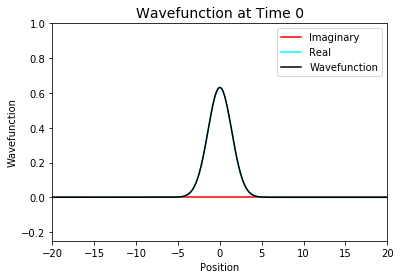

In [44]:
plt.plot(xs, Wavepkt(xs).imag, color = "red", label = "Imaginary")
plt.plot(xs, Wavepkt(xs).real, color = "cyan", label = "Real")
plt.plot(xs, abs(Wavepkt(xs)), color = "black", label = "Wavefunction")
plt.legend(loc = "upper right")
plt.ylim(-.25, 1)
plt.xlim(-20 - xc, 20 - xc)
plt.xlabel("Position")
plt.ylabel("Wavefunction")
plt.title("Wavefunction at Time 0", fontsize = 14)
plt.savefig("Images\Wavefunction at 0.jpg")
plt.show()

In [45]:
Wave_funcs = np.zeros([nsteps_t, nsteps_x], dtype = complex)
A = MatrixCreator(nsteps_x, V)
b = Wavepkt(xs)
for i in range(nsteps_t):
    v = np.linalg.solve(A, b)
    Wave_funcs[i] = v
    b = v

In [49]:
for i, func in enumerate(Wave_funcs):
    time = ts[i] + dt
    plt.plot(xs, func.imag, color = "red", label = "Imaginary")
    plt.plot(xs, func.real, color = "cyan", label = "Real")
    plt.plot(xs, abs(func), color = "black", label = "Wavefunction")
    plt.plot(xs, V, color = "green", label = "Potential")
    plt.legend(loc = "upper right")
    plt.ylim(-.25, 1)
    plt.xlim(-20 - xc, 20 - xc)
    plt.xlabel("Position")
    plt.ylabel("Wavefunction")
    plt.title("Wavefunction at Time {}". format(round(time, 2)), fontsize = 14)
    plt.savefig("Images\Wavefunction at {}.jpg".format(i+1))
    plt.close()

In [50]:
directory="Images/"
filenames = []

for i in range(nsteps_t + 1):
    if os.path.exists(directory+f"Wavefunction at {i}.jpg"):
        filenames.append(f"Wavefunction at {i}.jpg")

In [51]:
images = []

for filename in filenames:
    images.append(imageio.imread("Images/{}".format(filename)))
imageio.mimsave("Wavefunction Gif.gif", images)